In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('full_clean_df.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207426 entries, 0 to 207425
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   town_code       207426 non-null  category      
 1   naics           207426 non-null  int64         
 2   establishments  207426 non-null  float64       
 3   year            207426 non-null  datetime64[ns]
 4   town_name       207426 non-null  category      
 5   region          207426 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.7+ MB


'We can see at 2020 a dramatic spike that drops just as dramatically for 2021. Note that 2020 is when the pandemic \nstarted. Also interesting to see the overall dip when hurricane Maria hit and the aftermath.'

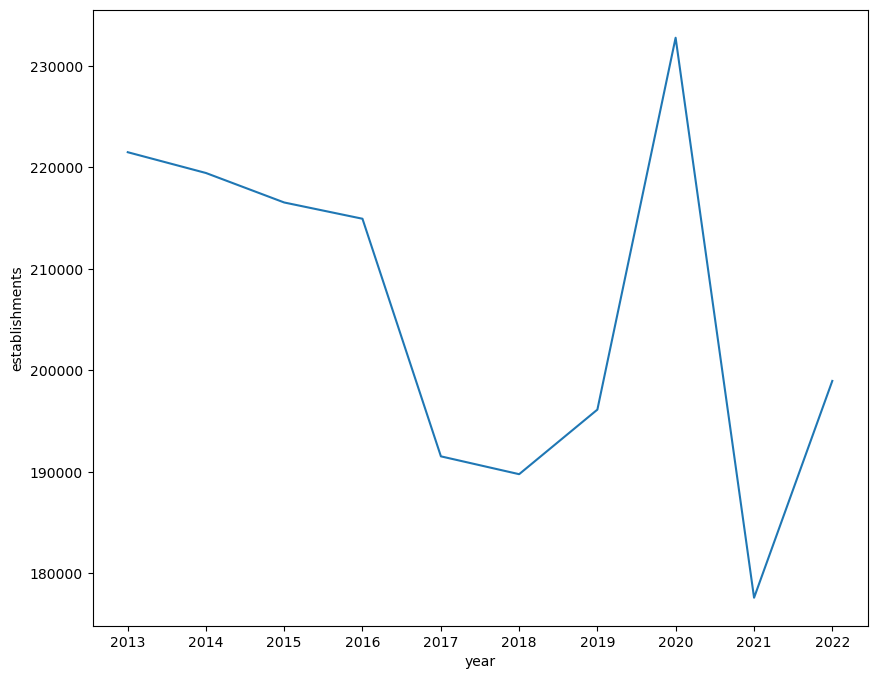

In [4]:
#total establishments over time
plt.figure(figsize=[10,8])
sns.lineplot(data=df, x='year', y='establishments', estimator='sum', errorbar=None)

"""We can see at 2020 a dramatic spike that drops just as dramatically for 2021. Note that 2020 is when the pandemic 
started. Also interesting to see the overall dip when hurricane Maria hit and the aftermath."""

"When we look at the regions, we see the stark difference betweeen the number of establishments overall in the metro \nvs the rest of the island. Note that the town regions we used were based off of the Puerto Rico tourism boards graphic\nthey use for promoting the island's regions.\n\nVery interesting to see the how the pandemic affected the metro area much more dramatically than the rest of the island, the\ndownturn is much more steep than in the other regions"

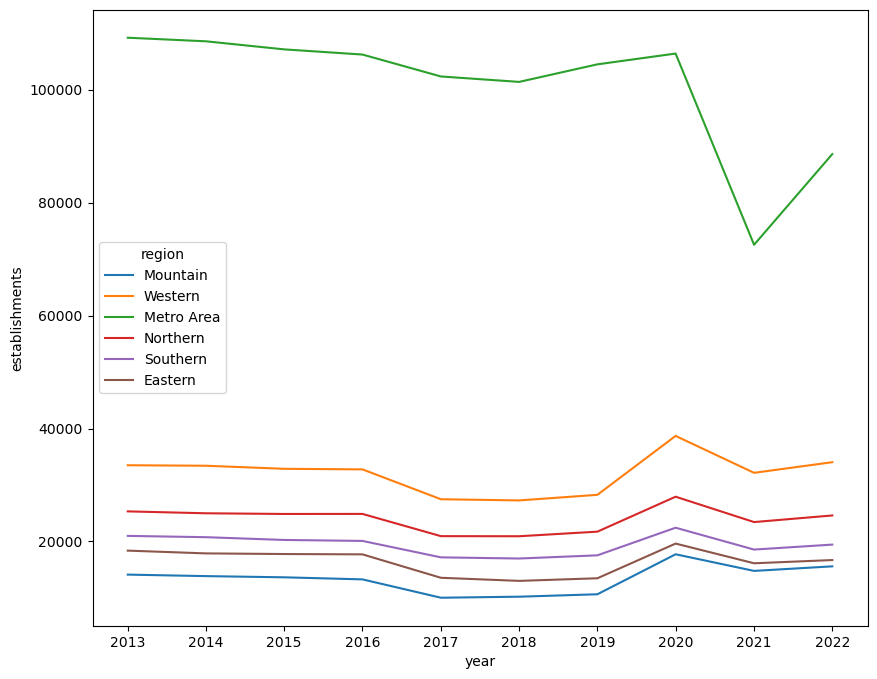

In [5]:
#total establishments over time by region
plt.figure(figsize=[10,8])
sns.lineplot(data=df, x='year', y='establishments', hue='region', estimator='sum', errorbar=None)

"""When we look at the regions, we see the stark difference betweeen the number of establishments overall in the metro 
vs the rest of the island. Note that the town regions we used were based off of the Puerto Rico tourism boards graphic
they use for promoting the island's regions.

Very interesting to see the how the pandemic affected the metro area much more dramatically than the rest of the island, the
downturn is much more steep than in the other regions"""

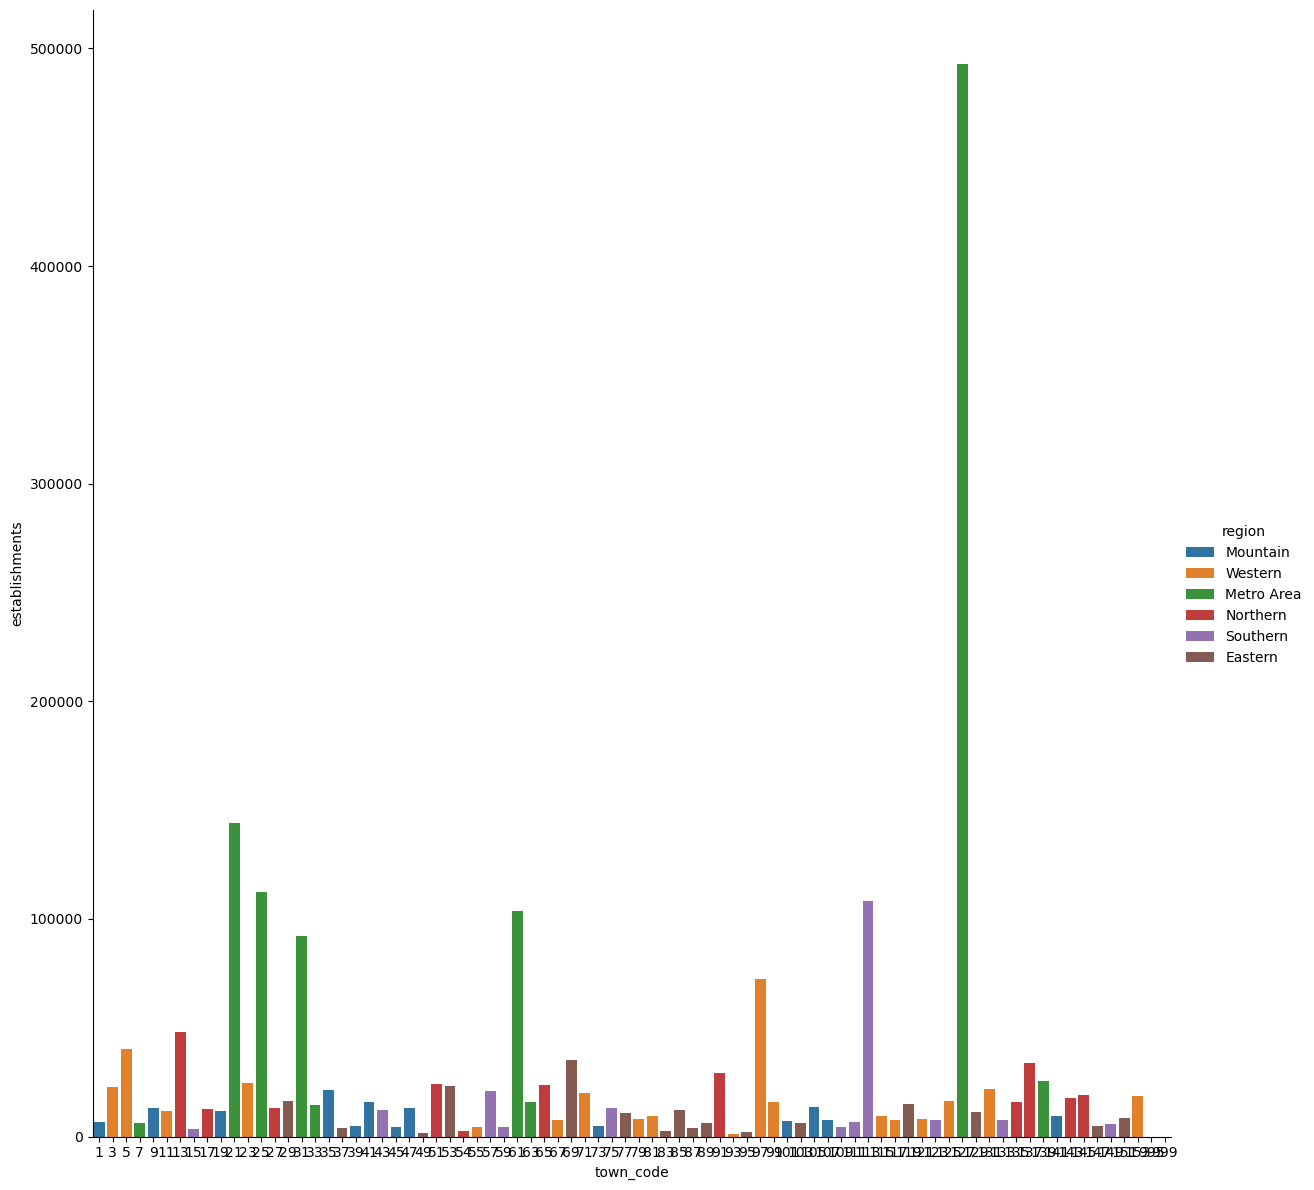

In [6]:
#total establishments by each town. hard to study this way so I will break it down.

sns.catplot(
    data=df, 
    kind="bar",
    estimator="sum",
    x="town_code",
    y="establishments",
    hue="region",
    errorbar=None,
    height=12,
    aspect=1
)

In [11]:
mountain = df[df['region'] == 'Mountain']
mountain.groupby('town_name')

C:\Users\NessaJay\AppData\Local\Temp\ipykernel_22440\3817182725.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mountain.groupby('town_name')


<Axes: xlabel='year', ylabel='Density'>

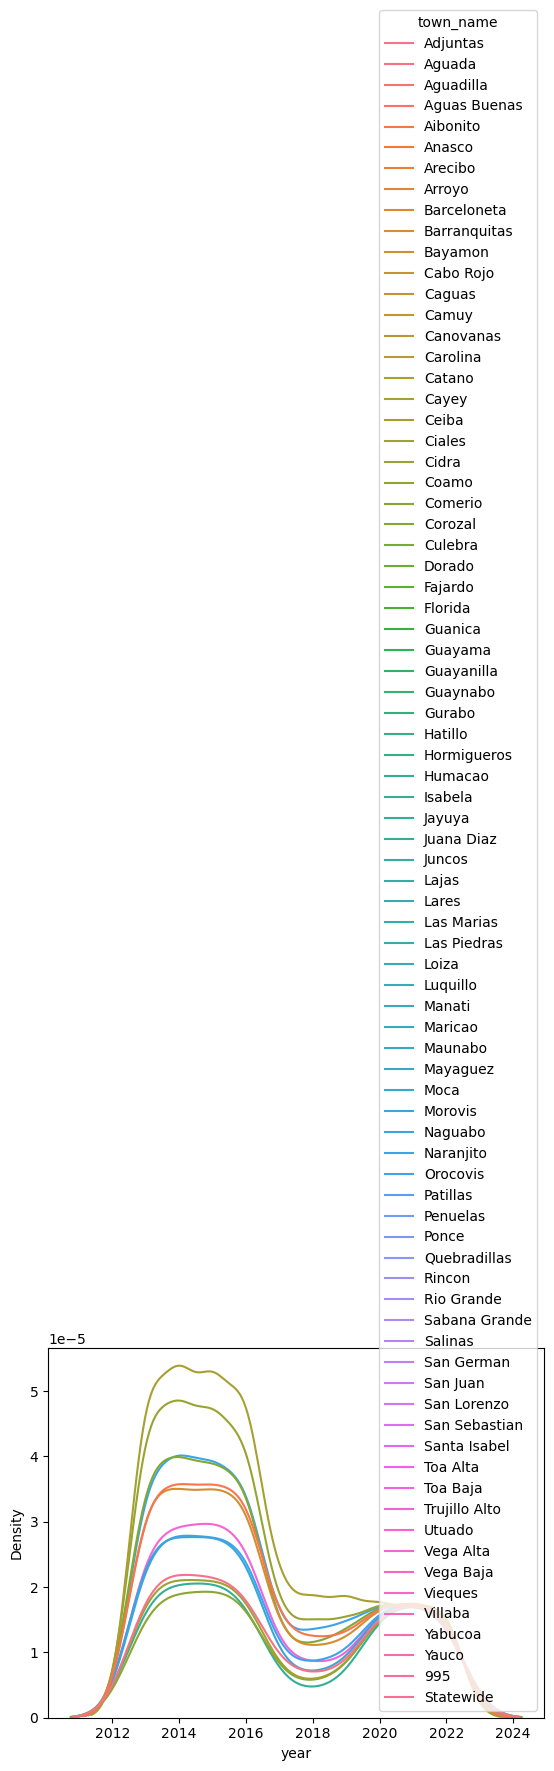

In [8]:
sns.kdeplot(data=mountain, x="year", hue="town_name")